In [1]:
import pandas as pd

In [56]:
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
df.sample(5)


,id,text,retweets,username,date,Hashtags,geo,Sentiment,SentimentClass
2957,1253343387891257348,IMF approves $363 million for Democratic Repub...,0,pangaea_zambia,2020-04-23 15:22:04+00:00,NaN,NaN,0.000,Neutral
1583,1248203129063124992,JUST IN: Ministry of Health has cancelled toda...,11,Mwebantu,2020-04-09 10:56:31+00:00,#Covid #ZAMBIA,NaN,0.000,Neutral
2253,1245341891236749313,KAMPYONGO'S ARROGANCY AMIDST COVID 19 MIGHT CO...,1,kalabadia,2020-04-01 13:26:58+00:00,NaN,NaN,-0.125,Negative
271,1243425540075208704,Dear esteemed clients. Kindly take note action...,0,Aflife_Zambia,2020-03-27 06:32:05+00:00,#RootedForGood,NaN,0.600,Positive
3095,1252721657782943747,15 Hurt in Solwezi COVID-19 Cleaning Rumpus ht...,0,Zambia,2020-04-21 22:11:32+00:00,NaN,NaN,0.000,Neutral


In [121]:
merged_text_col=merge_df_col_val(df["text"])
remove_RT_from_text=remove_RT(merged_text_col)
punct_rmvd_from_txt=remove_punct_marks(merged_text_col)
stp_wrds_rmvd_from_txt=remove_stop_words(punct_rmvd_from_txt)
meanless_wrds_rmvd_from_txt=remove_meaninglesswords(stp_wrds_rmvd_from_txt)
rmv_numbers_from_txt=remove_numeric(meanless_wrds_rmvd_from_txt)

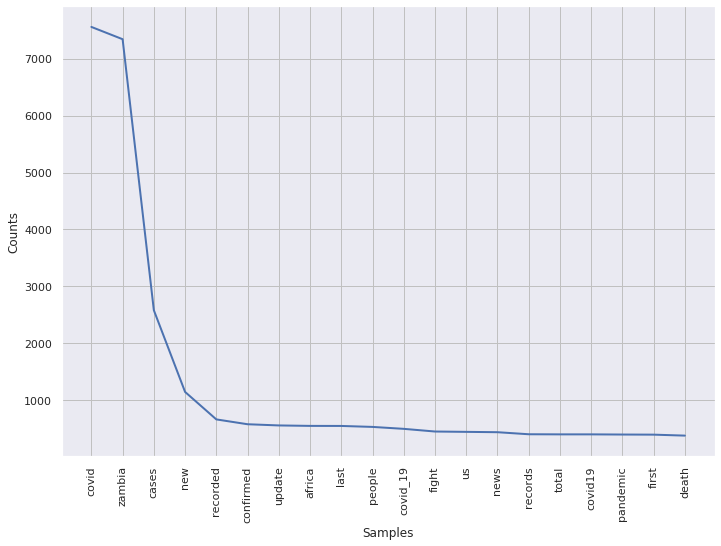

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
words=rmv_numbers_from_txt.split(" ")
nlp_words=nltk.FreqDist(words)
nlp_words.plot(20)

In [123]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

nouns=get_nouns(rmv_numbers_from_txt)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
words=nouns.split(" ")
nlp_words=nltk.FreqDist(words).most_common(20)

In [124]:
df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,zambia,5335
1,covid,3627
2,news,435
3,death,375
4,country,374


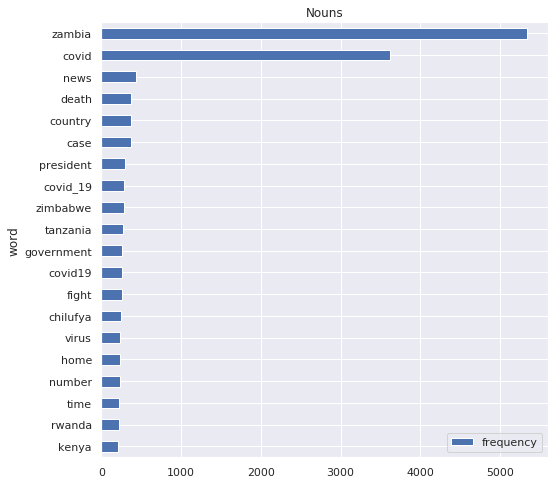

In [125]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Nouns")
plt.show()

In [84]:
import nltk
nltk.download('stopwords')

sw=nltk.corpus.stopwords.words('english')

def remove_stop_words(txt):
    words= txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word not in sw:
            words_ns.append(word)
    
    return list_to_str(words_ns)

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
def remove_numeric(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word.isnumeric() == False:
            words_ns.append(word)
    return list_to_str(words_ns)

In [28]:
def list_to_str(lst):
    nwstr=""
    for i in lst:
        nwstr+=i+" "
        
    return nwstr

In [76]:
def get_nouns(txt):
    nouns=['NNP','NN']
    new_tagged=[]
    
    text = word_tokenize(txt)
    tagged = nltk.pos_tag(text) 
    
    for tag in tagged:
        if tag[1] in nouns:
            new_tagged.append(tag[0])

    return list_to_str(new_tagged)
  

In [119]:
def remove_meaninglesswords(txt):
    words=txt.split(" ")
    meanless_words=['rt','http','https','www','amp','dr','com','today','health','minister','coronavirus']
    words_ns=[]
    
    for word in words:
        if word not in meanless_words:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [42]:
def remove_RT(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if '@' not in word:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [6]:
def merge_df_col_val(txt_col):
    newstr=""
    for t in txt_col.values.flatten():
        newstr+=t.lower() + ''
    return newstr

In [29]:
import re

def remove_punct_marks(txt):
    lst= re.findall('\w+',txt)
    
    return list_to_str(lst)